In [36]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [37]:
dataset=datasets.load_breast_cancer()

In [40]:
clf=KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(dataset.data,dataset.target,test_size=0.2,random_state=0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.9385964912280702

1 0.9208791208791209
3 0.9318681318681319
5 0.9208791208791209
7 0.9274725274725275
9 0.9362637362637363
11 0.9318681318681319
13 0.9362637362637363
15 0.9230769230769231
17 0.9230769230769231
19 0.9208791208791209
21 0.9186813186813186
23 0.9142857142857143
25 0.9142857142857143
27 0.9142857142857143
29 0.9120879120879121


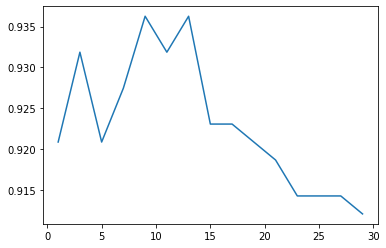

In [41]:
# searching for best value of k
import matplotlib.pyplot as plt
y=[]
x=[]
from sklearn.model_selection import cross_val_score
for i in range (1,30,2):
    clf=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(clf,x_train,y_train)
    x.append(i)
    y.append(score.mean())
    print(i,score.mean())
plt.plot(x,y)
plt.show()

In [54]:
# best k is 9

# implement knn from scretch

from collections import Counter

def predict_one(x_train,y_train,x_test,k):
    distances=[]
    dis=0
    for i in range(len(x_train)):
        dis= ((x_train[i:]-x_test)**2).sum()
        distances.append([dis,i])
    distances=sorted(distances)
    target=[]
    for i in range(k):
        index_of_train_data=distances[i][1]
        target.append(y_train[index_of_train_data])
    return Counter(target).most_common(1)[0][0]
        
        
        
        
def predict(x_train,y_train,x_test_data,k):
    predictions=[]
    for x_test in x_test_data:
        predictions.append(predict_one(x_train,y_train,x_test,k))
    return predictions

y_pred2=predict(x_train,y_train,x_test,9)
metrics.accuracy_score(y_test,y_pred2)

0.5877192982456141